Cette partie est une application du début du livre de Christopher M.Bishop "Pattern Recognition and Machine Learning  dans laquelle j'essaie de mettre en pratique ce que j'ai lu. 

En commmencant par du curve fitting sur les données météorologiques à une heure donnée à un lieu donné.

I) Polynomial Curve Fitting

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from scipy.optimize import minimize
from scipy.optimize import curve_fit

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [21]:
past_forecast = pd.read_csv('hourly_past_predicted_temperature_2m_2023.csv')
historical_data = pd.read_csv('hourly_past_real_temperature_2m_2023.csv')
historical_data = historical_data.rename(columns={historical_data.columns[0]: 'compteur'})
past_forecast = past_forecast.rename(columns={past_forecast.columns[0]: 'compteur'})

past_forecast_provisoire = past_forecast[~(past_forecast["compteur"].isin([8743,8744,8745,8746,8747]))]

In [22]:
past_forecast_provisoire["real_temperature_2m"]=historical_data["real_temperature_2m"]
past_forecast_provisoire["error"]=past_forecast_provisoire["temperature_2m"]-past_forecast_provisoire["real_temperature_2m"]
past_forecast_provisoire["absolute_error"]=abs(past_forecast_provisoire["error"])

In [23]:
past_forecast_provisoire['date'] = pd.to_datetime(past_forecast_provisoire['date'])

In [26]:
fin_apres_midi = past_forecast_provisoire[past_forecast_provisoire["date"].dt.hour == 18]
un_lieu_une_heure = fin_apres_midi.head(365)
un_lieu_une_heure.describe()



,compteur,temperature_2m,latitude,longitude,real_temperature_2m,error,absolute_error
count,365.000000,365.000000,365.0,365.0,365.000000,365.000000,365.000000
mean,4386.000000,11.368763,43.0,-5.0,10.784541,0.584222,1.348156
std,2532.255911,7.706593,0.0,0.0,7.024727,1.639407,1.098813
min,18.000000,-5.318500,43.0,-5.0,-3.714500,-4.553999,0.004000
25%,2202.000000,4.981500,43.0,-5.0,5.485500,-0.454000,0.504000
50%,4386.000000,11.181500,43.0,-5.0,10.935500,0.546000,1.104000
75%,6570.000000,17.431500,43.0,-5.0,15.985499,1.595999,1.845997
max,8754.000000,33.131500,43.0,-5.0,29.385500,6.595999,6.595999


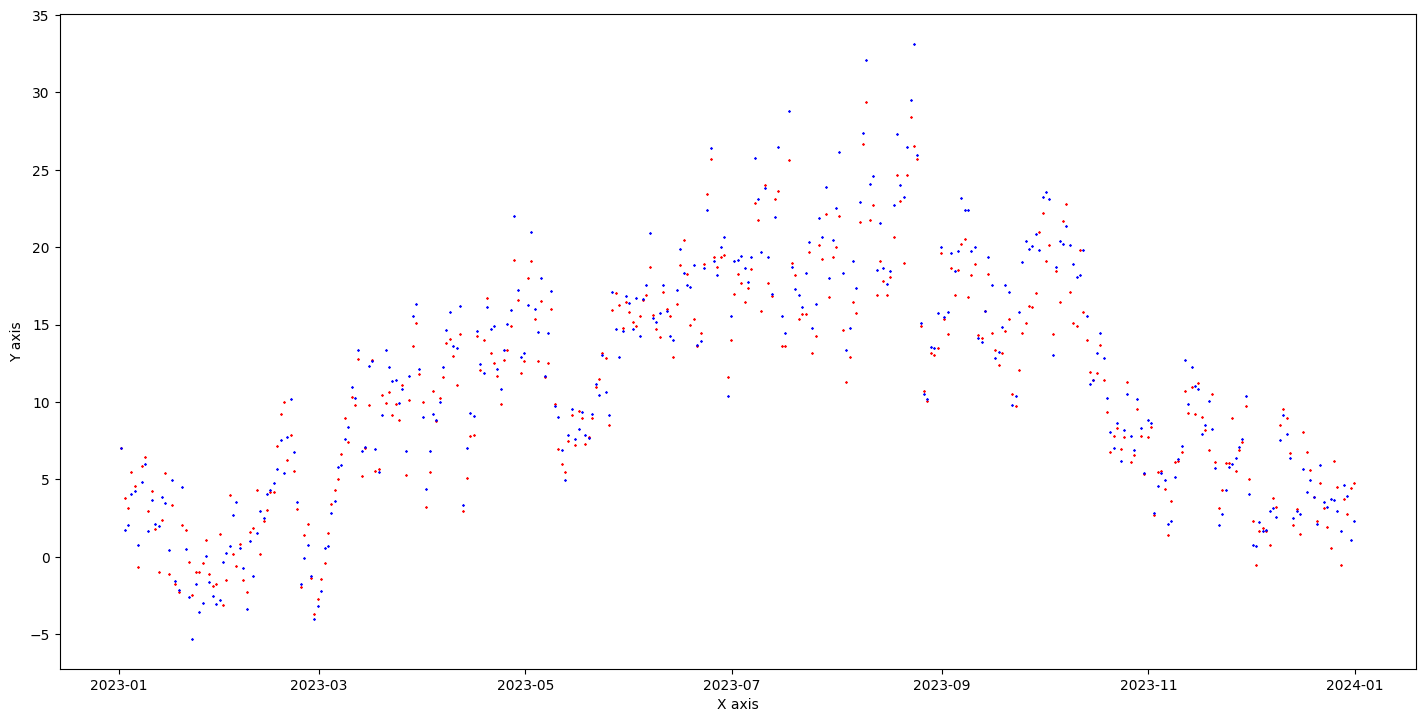

In [25]:
x = un_lieu_une_heure["date"]
y1 = un_lieu_une_heure["real_temperature_2m"]
y2 = un_lieu_une_heure["temperature_2m"]

fig = plt.figure(figsize=(17.5,8.5))

# Scatter plot the points
plt.scatter(x, y1, c='r', marker='X', s=0.5) # température réelle 
plt.scatter(x, y2, c='b', marker='X', s=0.5)  # température prédite par le modèle 

# Set labels
plt.xlabel('X axis')
plt.ylabel('Y axis')


plt.show()

In [ ]:
M=3 #degré du polynome

X=un_lieu_une_heure["temperature_2m"].sample(10).head(10)
T=un_lieu_une_heure["real_temperature_2m"].head(10)

print(X)
def y(x, w): 
    somme=0
    for i in range(M):
        print(i)
        coeff = w[i]*x**i
        somme+=coeff
    return somme 

def error_function(w):
    error=0
    for i in range(len(X)):
        coeff=(y(X[i],w)-T[i])**2
        error+=coeff
    return(1/2 * error)


x0 = np.array([-1,2,-3,10])
result = minimize(error_function, x0)
argmin = result.x
print("Argmin:", argmin)


polynome = np.polynomial.Polynomial(argmin)
x = np.linspace(-10, 10, 1000)
y_value = y(x, argmin) 

plt.plot(x, y_value)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Function Plot')
plt.grid(True)
plt.show()


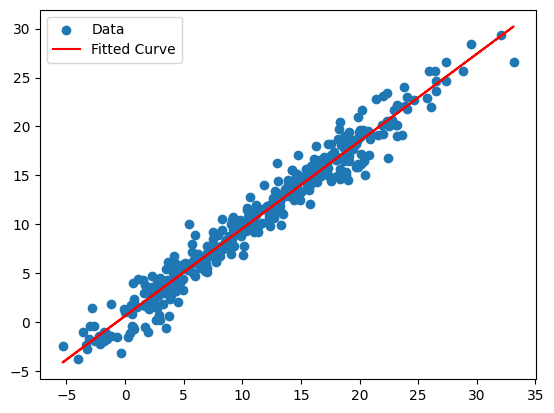

In [71]:
x=un_lieu_une_heure["temperature_2m"]
T=un_lieu_une_heure["real_temperature_2m"]
df = pd.DataFrame(x)


# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=1)
X = poly.fit_transform(df)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, T)

# Make predictions on the entire range of x
y_pred = model.predict(poly.fit_transform(df))

plt.scatter(x, T, label='Data')
plt.plot(x, y_pred, color='red', label='Fitted Curve')
plt.legend()
plt.show()


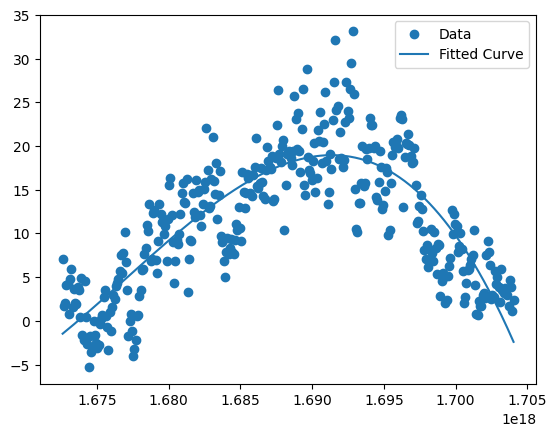

In [77]:
time = un_lieu_une_heure["date"].values.astype(float)
values=un_lieu_une_heure["temperature_2m"].values

def polynomial(x, a, b, c, d):
    return a * x**3 + b * x**2 + c*x + d


# Fit the curve
popt, pcov = curve_fit(polynomial, time, values )

# Plot the data and the fitted curve
plt.scatter(time, values, label='Data')
plt.plot(time, polynomial(time, *popt), label='Fitted Curve')
plt.legend()
plt.show()